                                                                                                            Anthony Kuey
# PROBLEM STATEMENT (Pre & Post Test)

Sistolic blood pressure (SBP) was measured before and after an experimental treatment. We want to know if the SBP decreased on average from the SBP prior to treatment.

### **Contents:**<br>
>**Paired T-Test**
1. [Visualizing Effect Size](#es)<br>
2. [Execute Hypothesis Test](#hyp)

>**Non-Parametric Wilcoxon Signed-Rank Test**
1. [Hypothesis Test](#wsr)

## Paired T-Test

In [14]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy import stats

In [15]:
file = 'BloodPressure.txt'

df = pd.read_csv(file, sep='\t', index_col='Subject')
df.head()

,Before,After
Subject,,
1,135,127
2,142,145
3,137,131
4,122,125
5,147,132


In [94]:
#Add column calculating different between pre-post treatment
df['diff'] = df['After'] - df['Before']

#State the average difference pre/post treatment
d_hat = df['diff'].mean()
sem = df['diff'].sem() #standard error of sample

#Describe sample
print(df.head())
print(f'\nThe average difference of SBP pre to post treatment is {d_hat}')
print(f'\nThe individual differences on average move {sem:.2f} units from d_hat')

         Before  After  diff  rank
Subject                           
1           135    127    -8  12.5
2           142    145     3  22.5
3           137    131    -6  14.5
4           122    125     3  22.5
5           147    132   -15   6.0

The average difference of SBP pre to post treatment is -8.0

The individual differences on average move 2.06 units from d_hat


### Visualize the effect size <a class="anchor" id="es"></a>
We can visualize the effect using:
>1) Boxplots
<br>2) Scatter plot w/ 45degree line (x=y) : If the majority of points fall to the right of the line, this is a visual cue that there has been an effect

#1

TypeError: 'Text' object is not callable

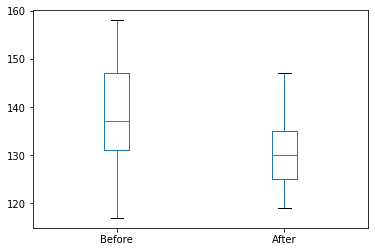

In [36]:
df[['Before', 'After']].plot(kind='box')

plt.title('SBP Before & After Treatment')
plt.show()

#2

In [18]:
#Create function to add arbitrary line of choosing to plot (not native to matplotlib)
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

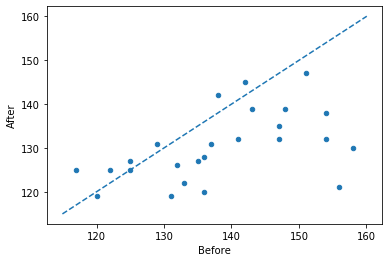

In [19]:
#Plot Scatter
df.plot(kind='scatter', x='Before', y='After')

#add 45degree line, x=y
abline(1, 0)

### **Hypothesis Test** <a class="anchor" id="hyp"></a>

Ho: There is no difference in mean SBP 
<br><br>$M_b - M_a = 0$

<br>Ha: SBP after treatment is lower than before treatment 
<br><br>$M_a < M_b$
<br><br>$\alpha=.05$

**Python Paired Sample T-test using SciPy**

In [20]:
from scipy.stats import ttest_rel

#Pyton paired sample t-test
t_stat, p_value = ttest_rel(df.After, df.Before)
print(f'Test Statistic={t_stat:.2f}, Pvalue={p_value:.5f}')

Test Statistic=-3.89, Pvalue=0.00070


In [21]:
#Use Pingouin library to get confidence interval
import pingouin as pt

pt.ttest(df.After, df.Before, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-3.888201,24,two-sided,0.000699,"[-12.25, -3.75]",0.79966,47.601,0.969519


**Reporting Results from Paired T-Test:**

In [22]:
print('Before treatment, patients had an average SBP of {} and SE={:.2f}, post treatment mean SBP={} with a SE={:.2f}'.format(df['Before'].mean(), df['Before'].sem(), df['After'].mean(), df['After'].sem()))
print(f'\nThe average difference after treatment of {d_hat:.2f} with a low p-value of {p_value:.5f} suggests that the observed difference in SBP is significant & unlikely due to chance')

Before treatment, patients had an average SBP of 138.28 and SE=2.34, post treatment mean SBP=130.28 with a SE=1.59

The average difference after treatment of -8.00 with a low p-value of 0.00070 suggests that the observed difference in SBP is significant & unlikely due to chance


### INTERPRETATION NOTES:

**Interpreting Cohen’s D**
<br>Normally, we interpret Cohen’s D  in terms of the relative strength of e.g. the treatment. Cohen (1988) suggested that d=0.2 is a ‘small’ effect size, 0.5 is a ‘medium’ effect size, and that 0.8 is a ‘large’ effect size. Thus, if two groups' means don’t differ by 0.2 standard deviations or more, the difference may be trivial, even if it is statistically significant.

***
SCRAPS - Mechanical (Conceptual) Walkthrough

In [23]:
def test_statistic(d_hat, se): return (d_hat - 0) / se

In [24]:
#Calculate average difference in SBP before/after treatment
d_hat = df['diff'].mean()

#Calculate the standard error of those differences
se = df['diff'].sem(axis=0)

#Calculate the test-statistic to convert the observed average difference in terms of Standard Errors
t_stat = test_statistic(d_hat, se) 

In [25]:
t_stat

-3.888201414050007

## Wilcoxon Signed-Rank Test <a class="anchor" id="wsr"></a>
Testing Median difference in SBP

**Key Points:** 
 - Pros:<ui>
1. No need to assume normality (normal dist)
2. Large sample size N not required
<br><br>
 - Cons:
1. Less power than parametric approach

***Notes from researchgate.net***:<br>
*The reason for choosing a Wilcoxon signed-ranks sum test over a dependent t-test would typically be that: (a) you can't assume that your data are of interval strength/scale (or better); and/or (b) you can't assume that your data are normally distributed.<br><br>
If condition (a) is the case, then medians would be preferred over means as the pre-post values to use.  Even if only condition (b) is the case, medians are a more robust indicator of central tendency (and less sensitive to extreme scores), so medians are probably a better choice than means.*

In [81]:
#Create rank col
df['rank'] = df['diff'].rank()
df.head()

,Before,After,diff,rank
Subject,,,,
1,135,127,-8,12.5
2,142,145,3,22.5
3,137,131,-6,14.5
4,122,125,3,22.5
5,147,132,-15,6.0


In [80]:
#Assign Variables
pos = np.where(df['diff'] > 0, 1, 0).sum()
neg = np.where(df['diff'] < 0, 1, 0).sum()
expect = np.arange(df.shape[0]).sum()
obs_pos = np.where(df['diff'] > 0, df['rank'], 0).sum()
obs_neg = np.where(df['diff'] < 0, df['rank'], 0).sum()

print("If the before & after groups belonged to the same distribution / were not stochastically different then we'd expect the\nsum of their ranks by differences in medians to be split 50/50")
print(f"\nWe'd expect the sum of ranks for positive changes to be {expect/2} and {expect/2} for negative")
print(f"\nHowever, we observed a sum of {obs_pos} for + differences and {obs_neg} for - differences. What's the likelihood\nof this occurring if the Null were true.")

If the before & after groups belonged to the same distribution / were not stochastically different then we'd expect the
sum of their ranks by differences in medians to be split 50/50

We'd expect the sum of ranks for positive changes to be 150.0 and 150.0 for negative

However, we observed a sum of 135.0 for + differences and 171.0 for - differences. What's the likelihood
of this occurring if the Null were true.


#### **Hypothesis Test** 

Ho: There is no difference in **median** SBP 
<br><br>$Med_b - Med_a = 0$

<br>Ha: The **median** SBP after treatment is lower than before treatment 
<br><br>$Med_a < Med_b$
<br><br>$\alpha=.05$


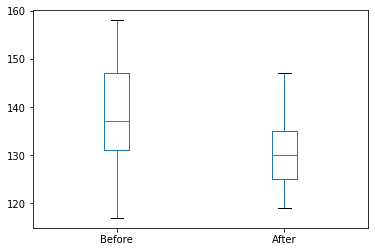

In [90]:
#Repeat visual association b/t SBP before vs after
df[['Before', 'After']].plot(kind='box')

In [99]:
#Run Wilcoxon Signed-Rank Test
#When there are ties in ranks or differences of 0, wilcoxon cannot perform exact p-value and will use apprx
stats.wilcoxon(df['Before'], df['After'], alternative='two-sided', correction=False) #correct=continuity correction y/n

WilcoxonResult(statistic=33.0, pvalue=0.0008220918692306016)

**Conclusion:** We observe a statistifcally significant result whereby we have an extremely low p-value in relation to our alpha threshold of .05. Therefore we have evidence against the null and will reject it.